## Domain Analysis

hours: represent how many hours each student study.

scores: the result based on the studying hours for each student 

In [5]:
#Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#reading Data

In [2]:
data='http://bit.ly/w-data'
Data=pd.read_csv(data)
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#Basic checks

In [3]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
#no null values in the data set

In [9]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis 

In [11]:
#it is only two variables so we can make the Bivariate analysis directly

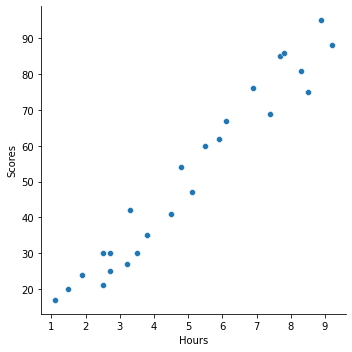

In [16]:
sns.relplot(x='Hours',y='Scores',data=Data)

In [17]:
#it is obvious that when the hours of studying increase the scores increase also, so the linear relationship is clear in that data set 

## Data preprocessing and feature engineering

<AxesSubplot:xlabel='Hours'>

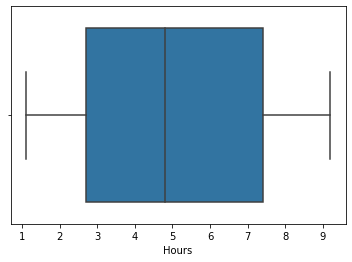

In [18]:
#there is no missing values or null values , no categorical values to be handled also
#we can check the outlier
sns.boxplot(x='Hours',data=Data)

In [19]:
#there is no outlier 

## Model creation 
we have only hours as feature to be analyze over it so we dont need feature selection in that data set


In [52]:
#Step 1 Independent and dependent variable creation
X=Data.Hours ## X variable contains all inputs
y=Data.Scores ## y is output

In [34]:
x=X.array.reshape(-1,1)

In [35]:
x

<PandasArray>
[
[2.5],
[5.1],
[3.2],
[8.5],
[3.5],
[1.5],
[9.2],
[5.5],
[8.3],
[2.7],
[7.7],
[5.9],
[4.5],
[3.3],
[1.1],
[8.9],
[2.5],
[1.9],
[6.1],
[7.4],
[2.7],
[4.8],
[3.8],
[6.9],
[7.8]
]
Shape: (25, 1), dtype: float64

In [36]:
Y=y.array.reshape(-1,1)

In [53]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
X_train

<PandasArray>
[
[7.7],
[9.2],
[5.9],
[3.2],
[3.5],
[7.4],
[1.9],
[8.9],
[2.5],
[7.8],
[3.3],
[5.5],
[2.7],
[6.1],
[2.7],
[8.3],
[5.1],
[1.5],
[6.9],
[1.1]
]
Shape: (20, 1), dtype: float64

In [55]:
# Step 3 Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression


LinearRegression()

In [59]:
y_pred = LR.predict(X_test)

In [56]:
y_test #actual values 

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [60]:
y_pred # predicted values by the model 

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [61]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_pred)

In [62]:
r2score

0.9454906892105356

In [44]:
#the score is above 94 which is accepted for that type of models 

In [66]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred))) # root mean squared error

21.5987693072174
4.6474476121003665


In [68]:
print(mean_absolute_error(y_test,y_pred))

4.183859899002975


In [76]:
# for sample prediction of 9.25 hours 
hours = np.array([9.25])

In [78]:
Hours=hours.reshape(1,-1)

In [80]:
my_pred=LR.predict(Hours)
my_pred

array([93.69173249])